### 1. Installing packages

In [5]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 2. Import dependencies

In [8]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 3. Basic processing

In [15]:
df = pd.read_csv("../week--02/data/processed/CEHHbInToW_handled_missing_values.csv")
##df.head(5)

### 4. Outlier detection techniques

#### 4.1 distribution plots

In [22]:
categorical_columns = [ "Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"]

numerical_columns = [ "Age", "Tenure","CreditScore", "Balance", "EstimatedSalary", "NumOfProducts"]

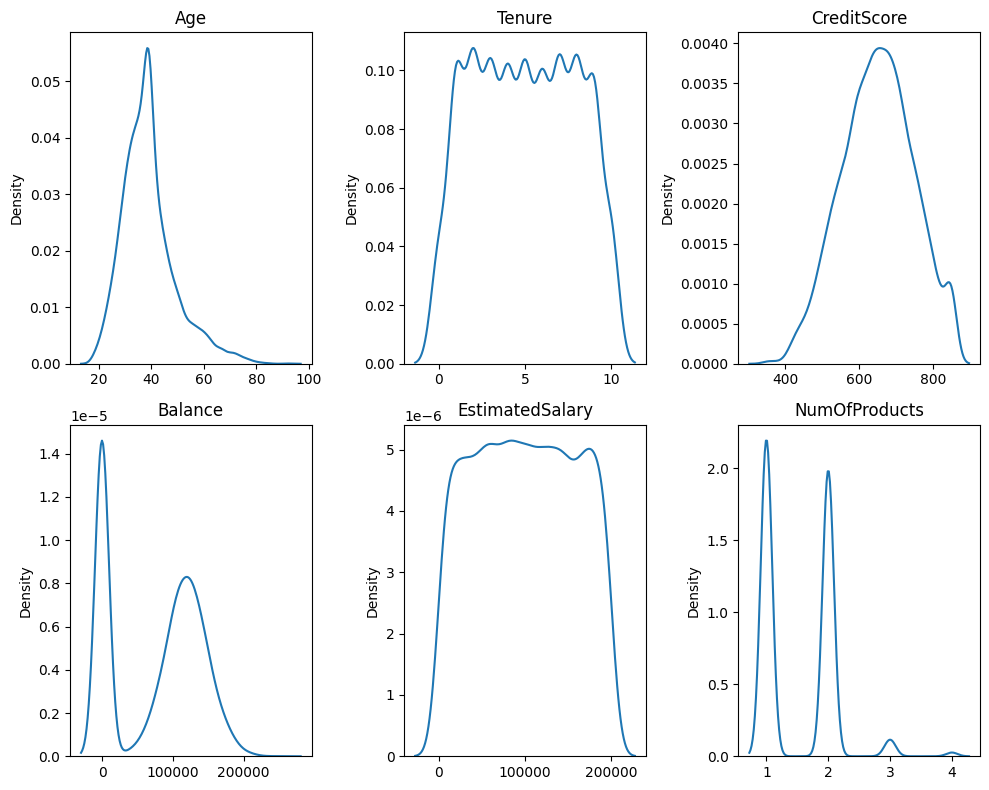

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
  sns.kdeplot(
    data=df[col],
    ax=axes[i],
  )
  axes[i].set_title(col)
  axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

Since NumOfProducts has no standard deviation it should go to categorical variable

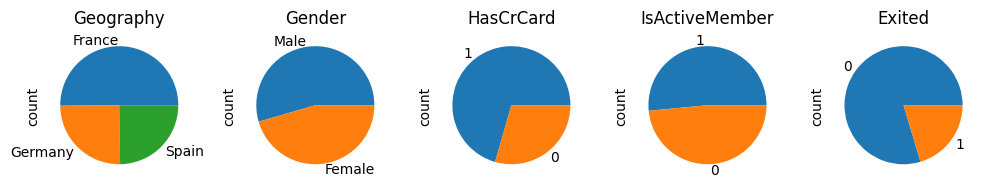

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(10, 8))

for i, col in enumerate(categorical_columns):
	df[col].value_counts().plot(
		kind="pie",
		ax=axes[i],
	)
	axes[i].set_title(col),
	
plt.tight_layout()
plt.show()


#### 4.2 Box plots

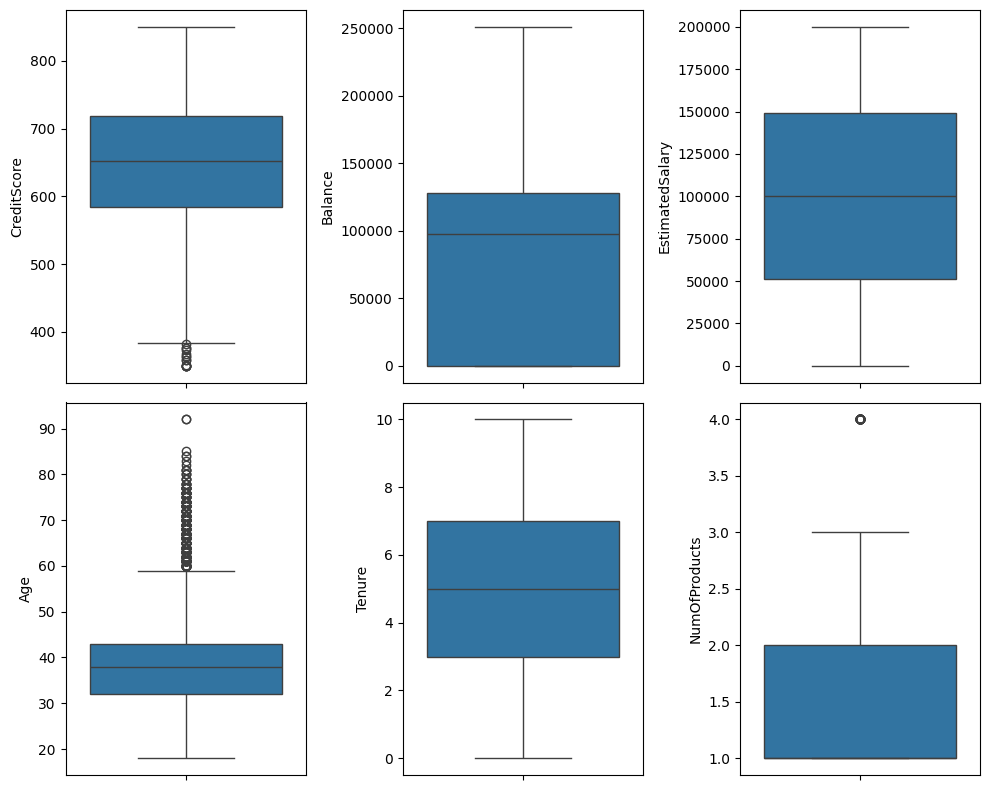

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

sns.boxplot(data=df["CreditScore"], ax=axes[0, 0])
sns.boxplot(data=df["Balance"], ax=axes[0, 1])
sns.boxplot(data=df["EstimatedSalary"], ax=axes[0, 2])
sns.boxplot(data=df["Age"], ax=axes[1, 0])
sns.boxplot(data=df["Tenure"], ax=axes[1, 1])
sns.boxplot(data=df["NumOfProducts"], ax=axes[1, 2])

plt.tight_layout()
plt.show()

#### 4.3 Empirical rule/3-sigma rule

In [42]:
def find_anomaly(data):
    
    mean = data.mean()
    std = data.std()

    lower_bound = mean - (3 * std)
    upper_bound = mean + (3 * std)
    
    return (data < lower_bound) | (data > upper_bound)

In [43]:
numerical_columns = [ "Age", "Tenure","CreditScore", "Balance", "EstimatedSalary"]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    print(f"{col}: {n_outliers} outliers")

Age: 144 outliers
Tenure: 0 outliers
CreditScore: 8 outliers
Balance: 0 outliers
EstimatedSalary: 0 outliers


#### IQR Method

In [44]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    return (data < lower_bound) | (data > upper_bound)

In [46]:
numerical_columns = [ "Age", "Tenure","CreditScore", "Balance", "EstimatedSalary"]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col}: {n_outliers} outliers ({n_outlier_percentage} %)")

Age: 501 outliers (0.05 %)
Tenure: 0 outliers (0.0 %)
CreditScore: 15 outliers (0.002 %)
Balance: 0 outliers (0.0 %)
EstimatedSalary: 0 outliers (0.0 %)


In [47]:
df.to_csv("../week--02/data/processed/CEHHbInToW_outliers_handled_values.csv", index=False)